In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

import pywt
import pywt.data
from keras.datasets import mnist
import time

In [3]:
from sklearn.naive_bayes import GaussianNB #NaiveBayes
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis #LDA, QDA
from sklearn.neighbors import NearestCentroid #NM
from sklearn.neighbors import KNeighborsClassifier #kNN
from sklearn.svm import SVC #SVM


In [31]:
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    NearestCentroid(),
    KNeighborsClassifier(n_neighbors=1),
    KNeighborsClassifier(n_neighbors=3, algorithm='brute'),
    KNeighborsClassifier(n_neighbors=5),
    KNeighborsClassifier(n_neighbors=7),
    SVC()  
]

title = [
    'Naiwny Bayes',
    'LDA',
    'Nearest Mean',
    'kNN1',
    'kNN3',
    'kNN5',
    'kNN7',
    'SVM'
]

In [5]:
(xtrain_mnist, y_train_mnist),(dataset, label) = mnist.load_data()

In [6]:
dataset_reshape = np.reshape(dataset, (dataset.shape[0], -1))
label_reshape = np.array(label, dtype=int)



xTest_mnist = np.reshape(xtrain_mnist, (xtrain_mnist.shape[0], -1))
y_test_mnist = np.array(y_train_mnist, dtype=int)

In [7]:
def fit_model(name, sample, data,label):

    X_train, X_test, y_train, y_test = train_test_split(
        data, label, test_size=sample, shuffle=True
    )
    name.fit(X_train,y_train)
    predicted = name.predict(X_test)

    return predicted, X_test, y_test

Dla oryginalnego obrazka

In [49]:
test_sample = 0.4

for idx, i in enumerate(classifiers):
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  start_time = time.time() 
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, dataset_reshape, label)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  end_time = time.time()  # Koniec mierzenia czasu
  elapsed_time = end_time - start_time
  print('Średnia dokłądności: ',meanAcc)
  print('Czas obliczania: ', elapsed_time, ' sekund')

Model:  GaussianNB()
Średnia dokłądności:  0.5767749999999999
Czas obliczania:  4.36169695854187  sekund
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.8525750000000001
Czas obliczania:  15.344528198242188  sekund
Model:  NearestCentroid()
Średnia dokłądności:  0.8177999999999999
Czas obliczania:  0.32445335388183594  sekund
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.946025
Czas obliczania:  9.264312028884888  sekund
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.9446749999999999
Czas obliczania:  9.991962671279907  sekund
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.941475
Czas obliczania:  11.176768064498901  sekund
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9402500000000001
Czas obliczania:  11.029876947402954  sekund
Model:  SVC()
Średnia dokłądności:  0.957975
Czas obliczania:  126.52386355400085  sekund


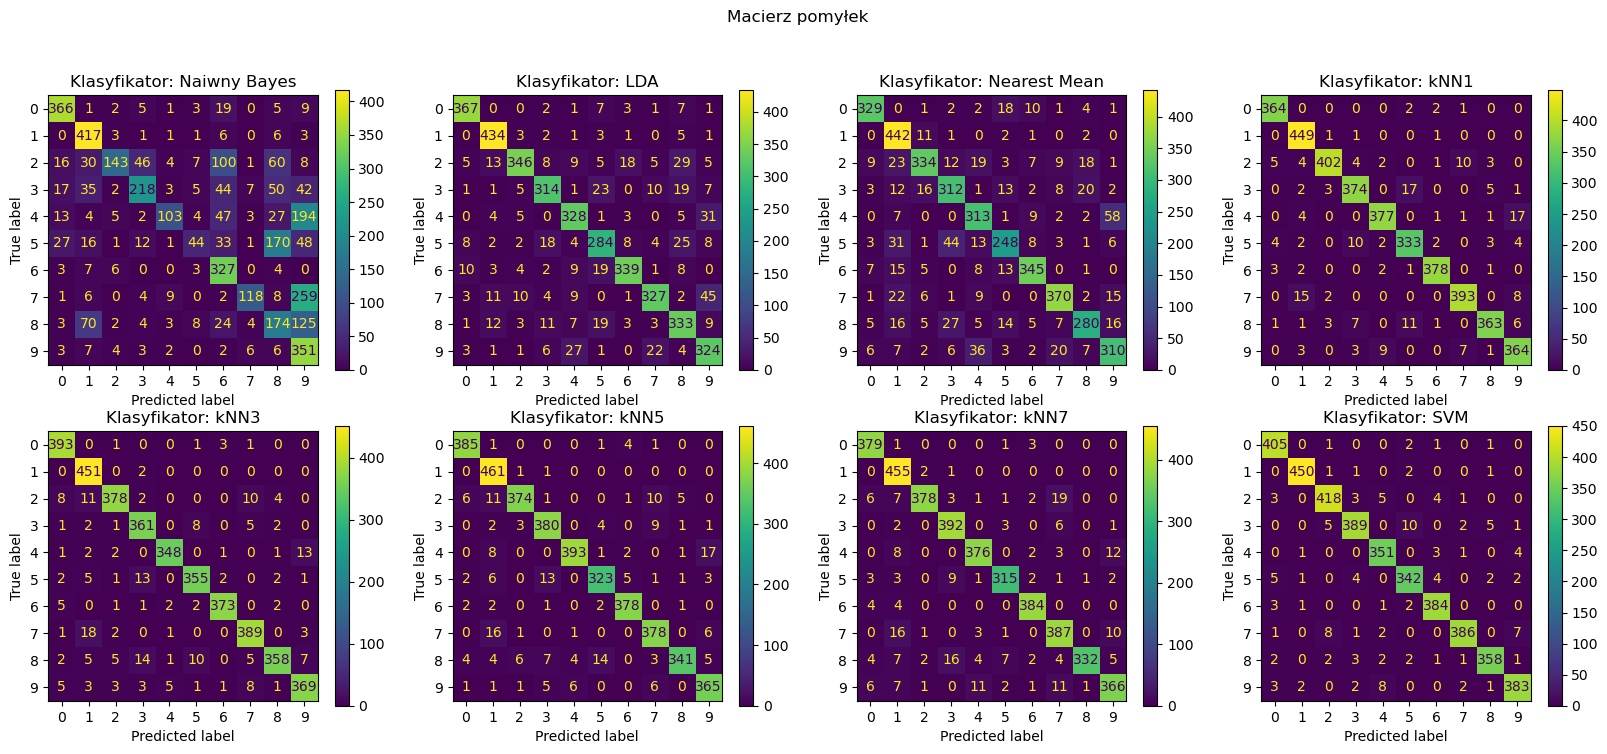

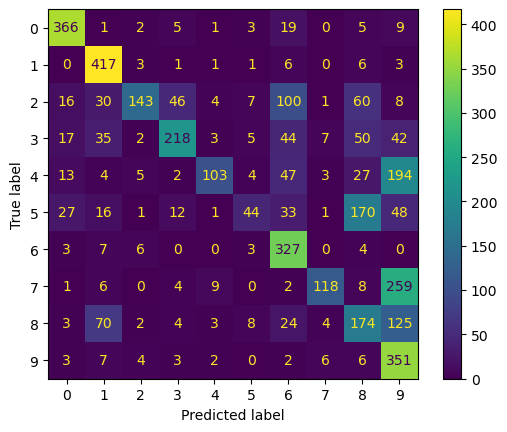

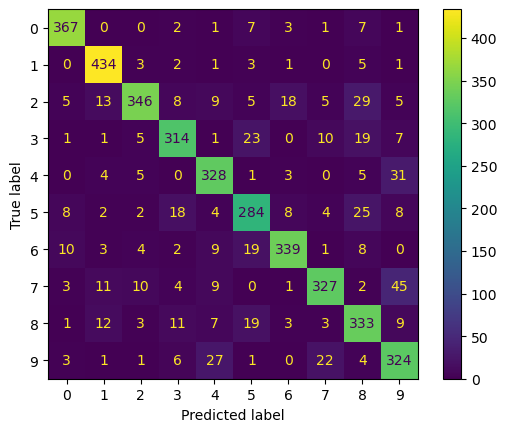

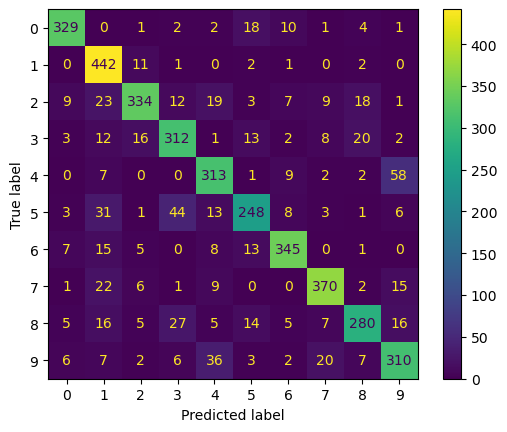

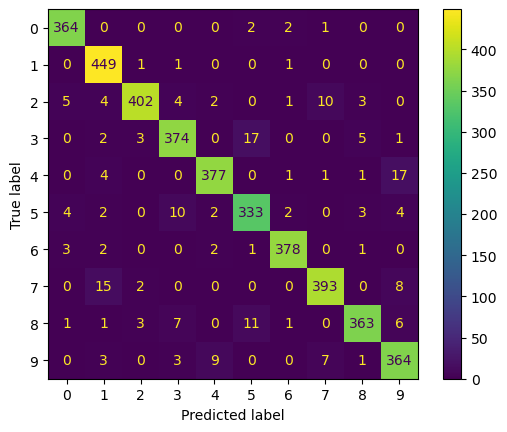

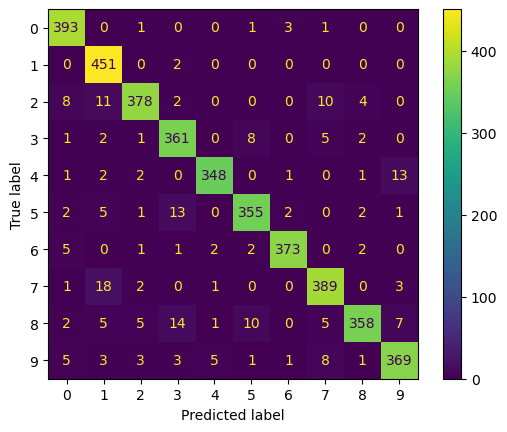

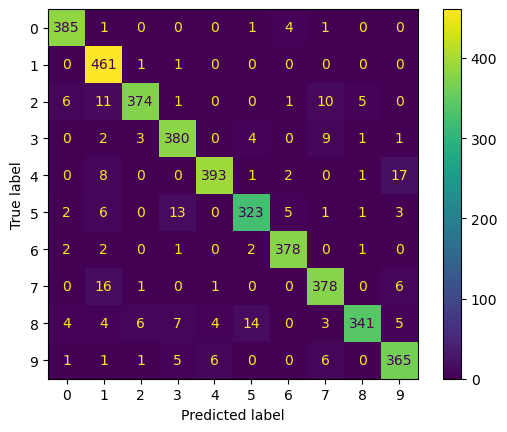

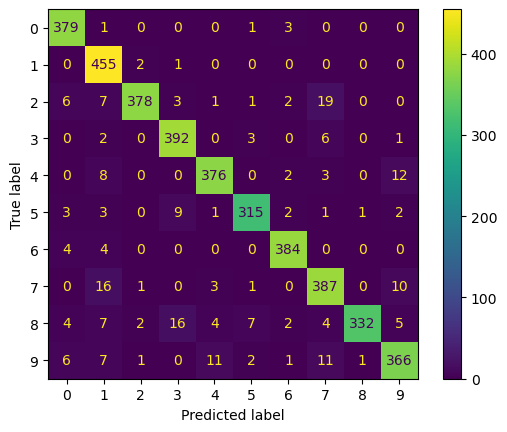

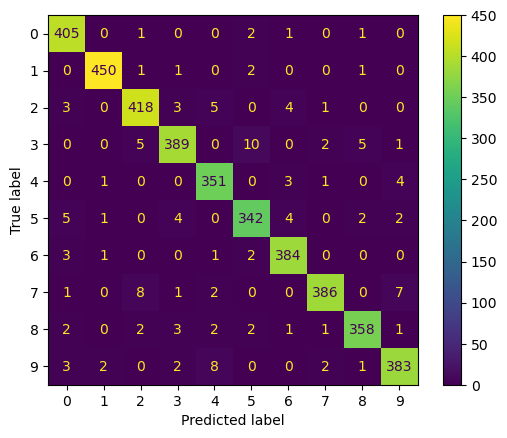

In [50]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for idx, i in enumerate(classifiers):
    predicted, X_test, y_test = fit_model(i,test_sample, dataset_reshape, label_reshape)
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    disp.plot(ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_title('Klasyfikator: ' + title[idx])

    # print(f"Confusion matrix:\n{disp.confusion_matrix}")
fig.suptitle("Macierz pomyłek")
# plt.tight_layout()
plt.show()

In [8]:
images_haar_full = np.empty(shape=(10000,56,14))
images_haar_LL = np.empty(shape=(10000,14,14))
images_haar_details = np.empty(shape=(10000,588))


for i in range(len(dataset)):
    db_2_mnist_test = pywt.dwt2(dataset[i], 'db1')
    LL, (LH, HL, HH) = db_2_mnist_test
    images_haar_full[i] = np.concatenate((LL,LH,HL,HH))
    images_haar_LL[i] = LL
    images_haar_details[i] = np.concatenate((LH,HL,HH), axis=None)

In [9]:
Data_mnist_haar_full = np.reshape(images_haar_full, (images_haar_full.shape[0], -1))

In [32]:
test_sample = 0.4

for idx, i in enumerate(classifiers):
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  start_time = time.time() 
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, Data_mnist_haar_full, label)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  end_time = time.time()  # Koniec mierzenia czasu
  elapsed_time = end_time - start_time
  print('Średnia dokłądności: ',meanAcc)
  print('Czas obliczania: ', elapsed_time, ' sekund')
  

Model:  GaussianNB()
Średnia dokłądności:  0.572625
Czas obliczania:  4.548972129821777  sekund
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.851625
Czas obliczania:  13.53257942199707  sekund
Model:  NearestCentroid()
Średnia dokłądności:  0.817075
Czas obliczania:  0.6684136390686035  sekund
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9471
Czas obliczania:  7.08923864364624  sekund
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.947175
Czas obliczania:  7.678231716156006  sekund
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.941325
Czas obliczania:  7.052371263504028  sekund
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9411999999999999
Czas obliczania:  7.264092445373535  sekund
Model:  SVC()
Średnia dokłądności:  0.9571
Czas obliczania:  118.36049127578735  sekund


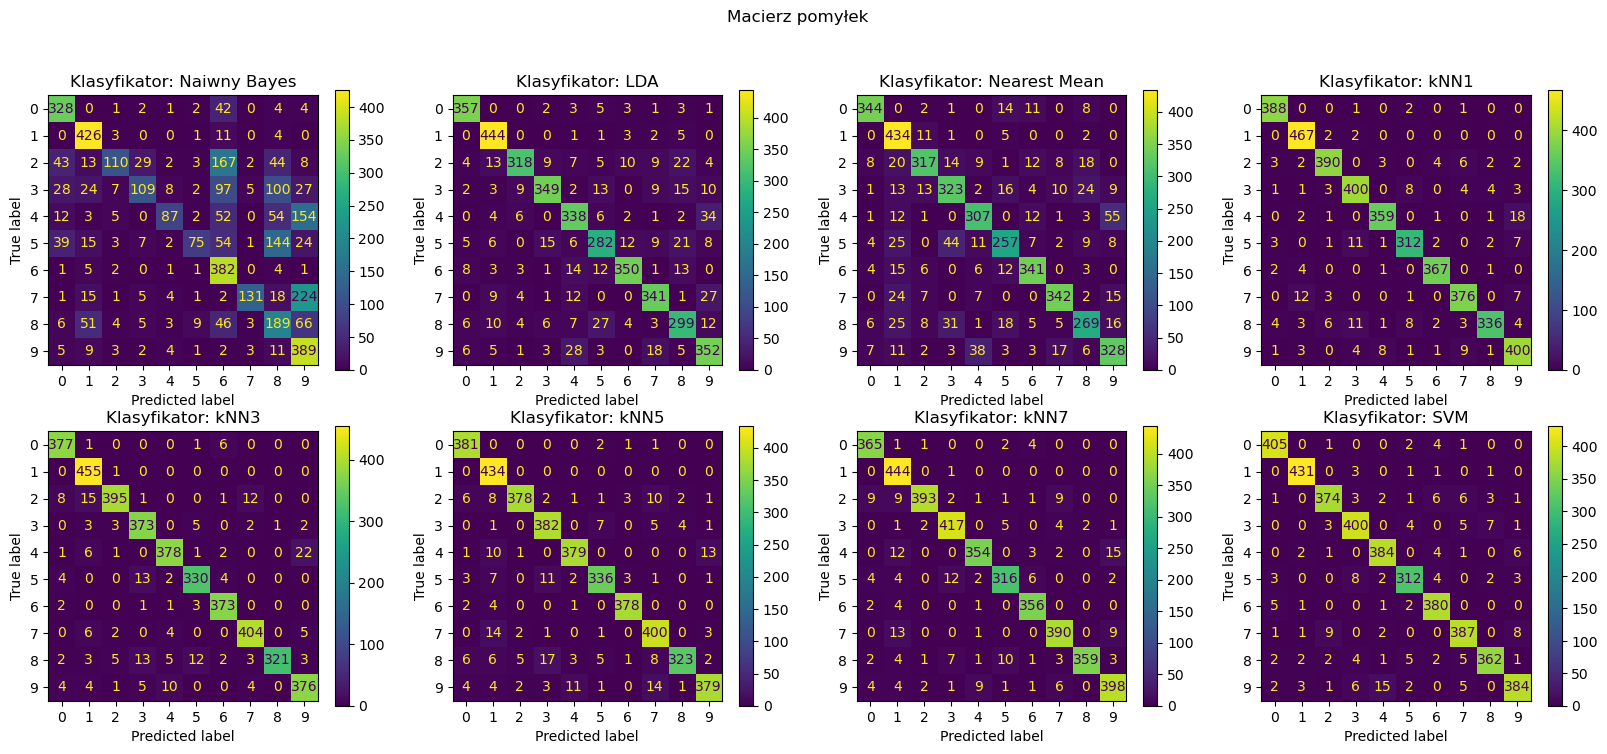

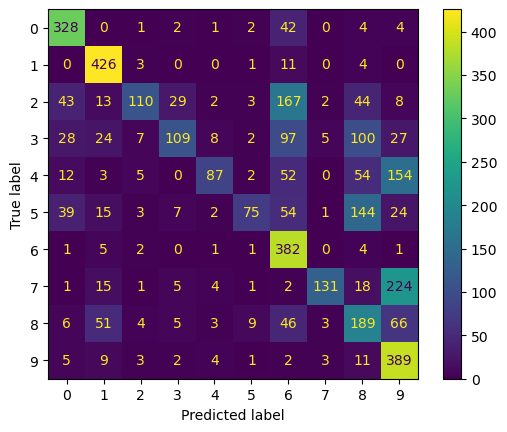

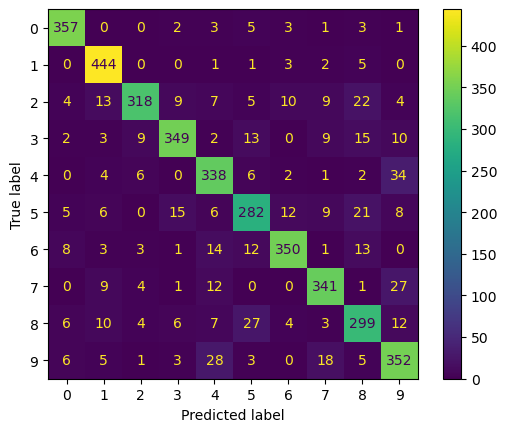

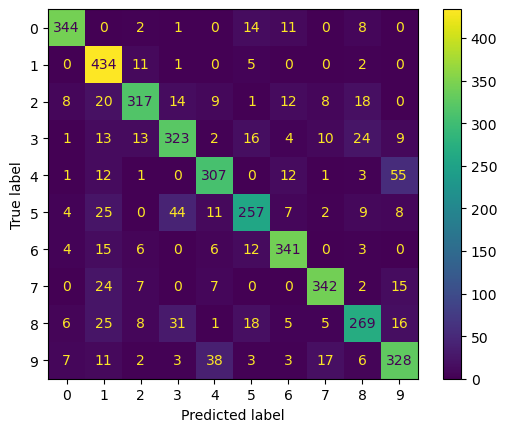

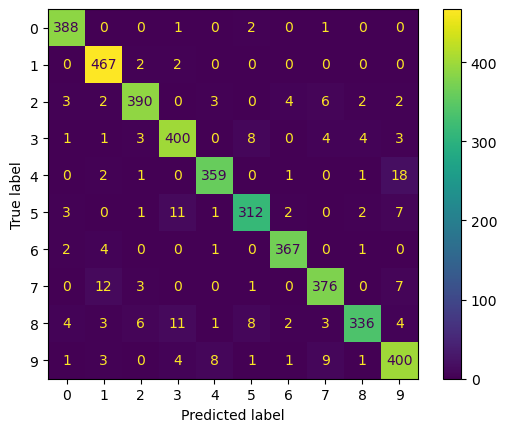

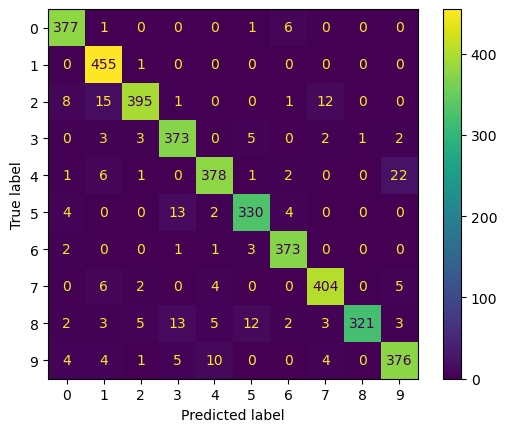

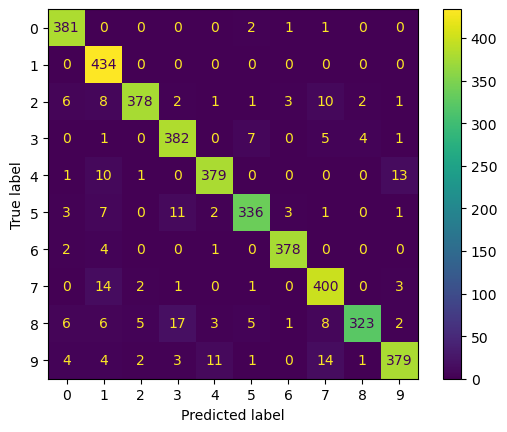

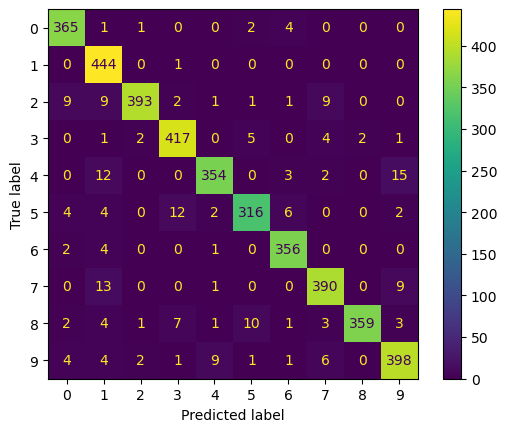

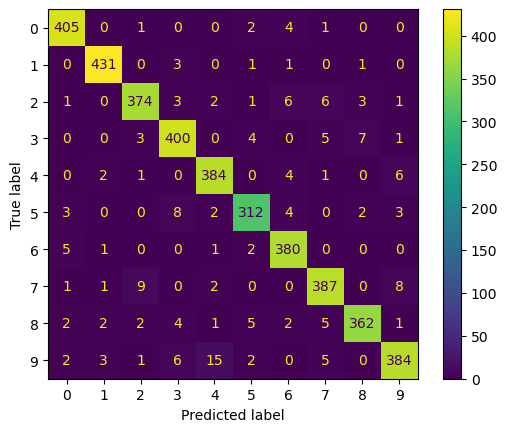

In [48]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for idx, i in enumerate(classifiers):
    predicted, X_test, y_test = fit_model(i,test_sample, Data_mnist_haar_full, label)
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    disp.plot(ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_title('Klasyfikator: ' + title[idx])

    # print(f"Confusion matrix:\n{disp.confusion_matrix}")
fig.suptitle("Macierz pomyłek")
# plt.tight_layout()
plt.show()

Haar Lvl 2

In [57]:
images_haar_full_2 = np.empty(shape=(10000,196))
images_haar_full = np.empty(shape=(10000,784))
images_haar_LL_2 = np.empty(shape=(10000,7,7))
images_haar_details_2 = np.empty(shape=(10000,147))

for i in range(len(images_haar_LL)):
    db_2_mnist_test = pywt.dwt2(images_haar_LL[i], 'db1')
    LL2, (LH2, HL2, HH2) = db_2_mnist_test
    images_haar_full_2[i] = np.concatenate((LL2,LH2,HL2,HH2), axis=None)
    images_haar_full[i] = np.concatenate((images_haar_full_2[i],images_haar_details[i]), axis=0)
    images_haar_LL_2[i] = LL2
    images_haar_details_2[i] = np.concatenate((LH2,HL2,HH2), axis=None)

In [53]:
images_haar_full_L2 = np.reshape(images_haar_full_2, (images_haar_full_2.shape[0], -1))
images_haar_details_L1 = np.reshape(images_haar_details, (images_haar_details.shape[0], -1))

In [54]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  start_time = time.time() 
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, images_haar_full, label)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  end_time = time.time()  # Koniec mierzenia czasu
  elapsed_time = end_time - start_time
  print('Średnia dokłądności: ',meanAcc)
  print('Czas obliczania: ', elapsed_time, ' sekund')

Model:  GaussianNB()
Średnia dokłądności:  0.54815
Czas obliczania:  4.544360399246216  sekund
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.8553499999999999
Czas obliczania:  14.542057275772095  sekund
Model:  NearestCentroid()
Średnia dokłądności:  0.8225000000000001
Czas obliczania:  0.7136843204498291  sekund
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9443249999999999
Czas obliczania:  8.847587585449219  sekund
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.9467000000000001
Czas obliczania:  8.058327436447144  sekund
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.9408
Czas obliczania:  8.1317458152771  sekund
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.9385999999999999
Czas obliczania:  9.471670627593994  sekund
Model:  SVC()
Średnia dokłądności:  0.957625
Czas obliczania:  128.8958785533905  sekund


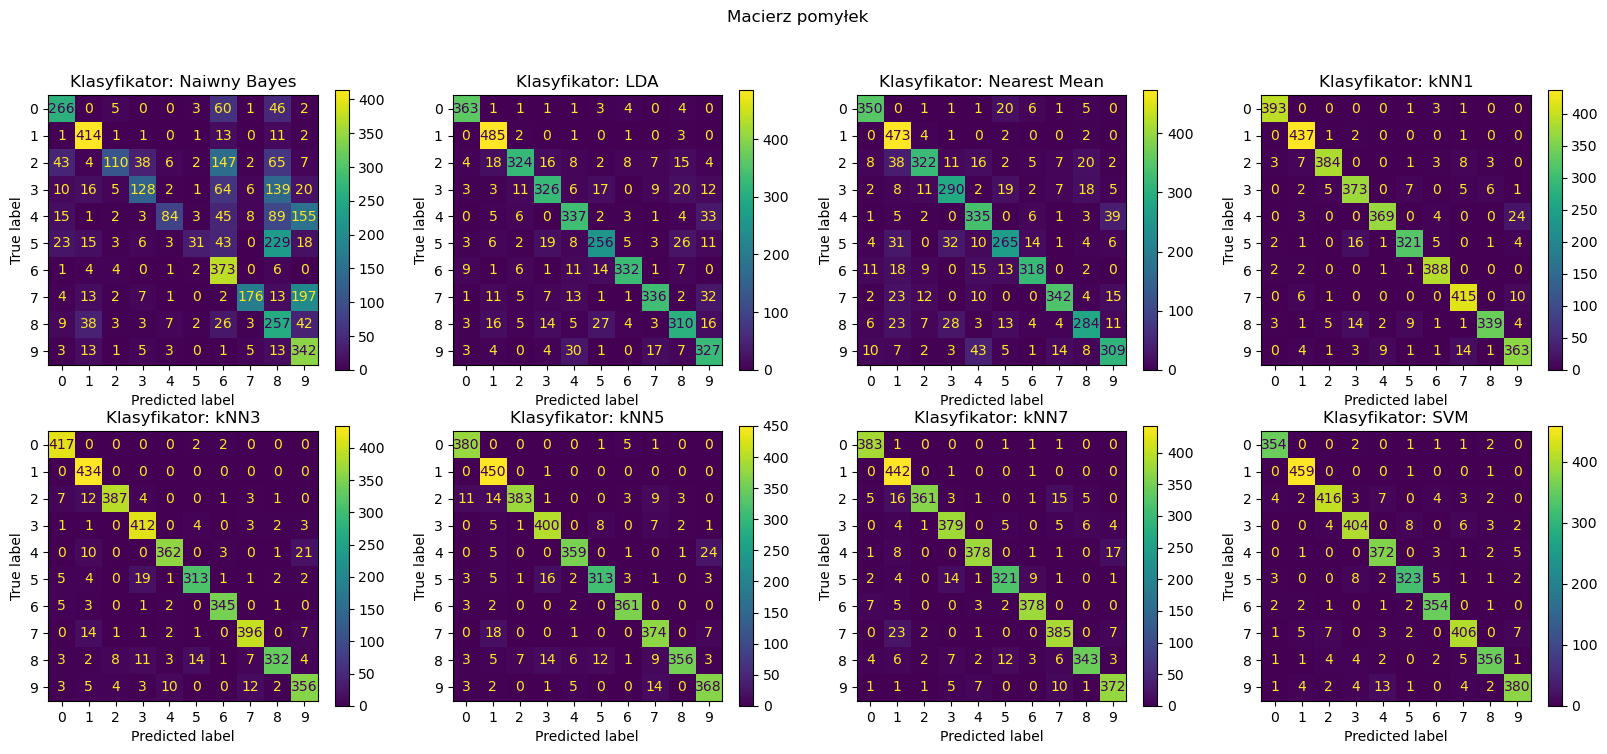

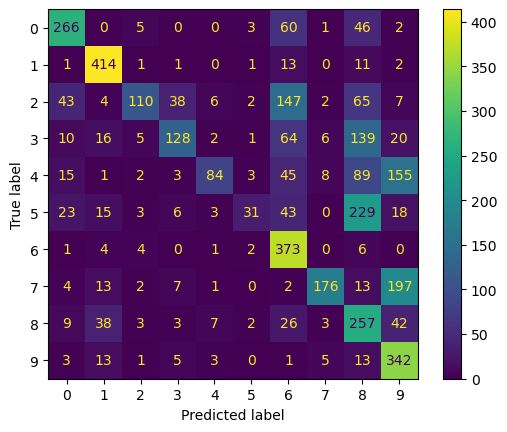

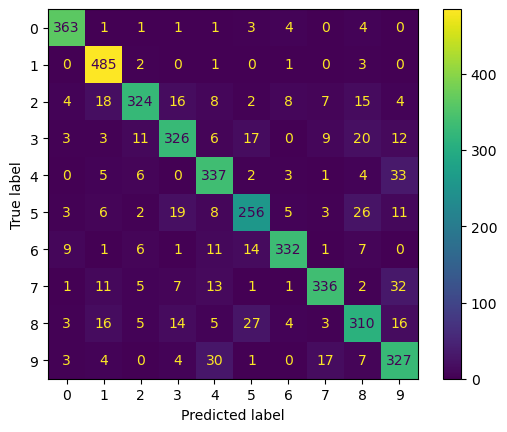

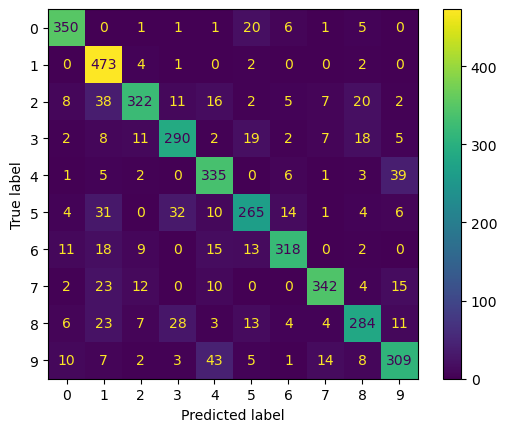

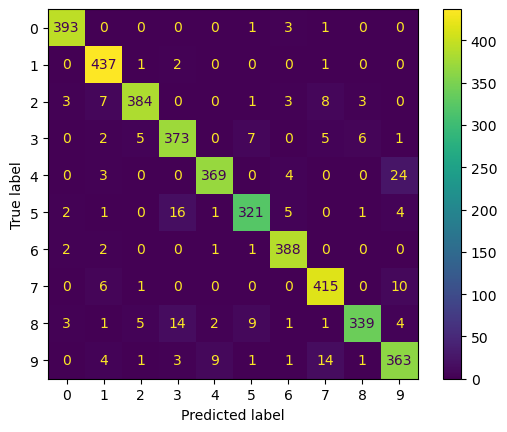

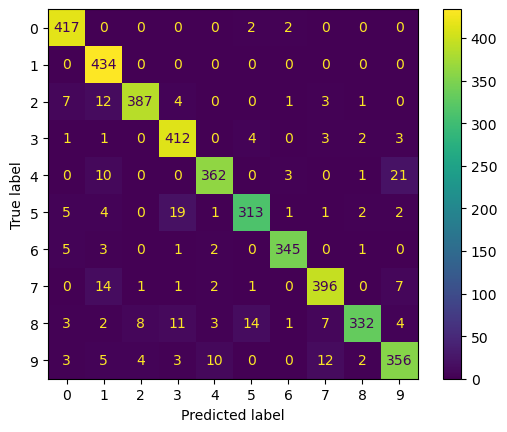

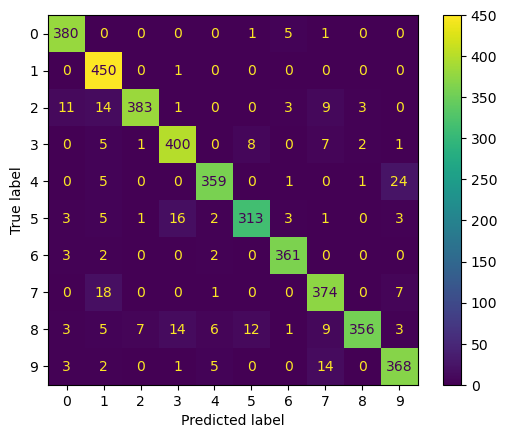

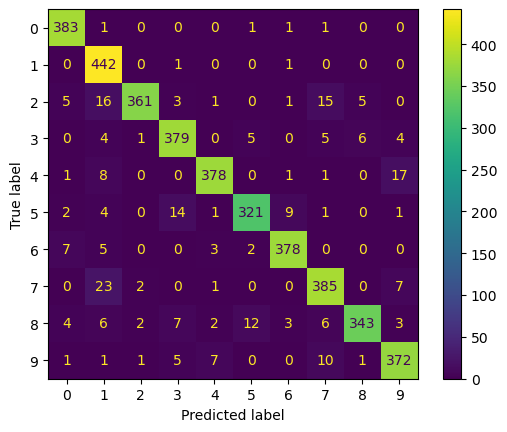

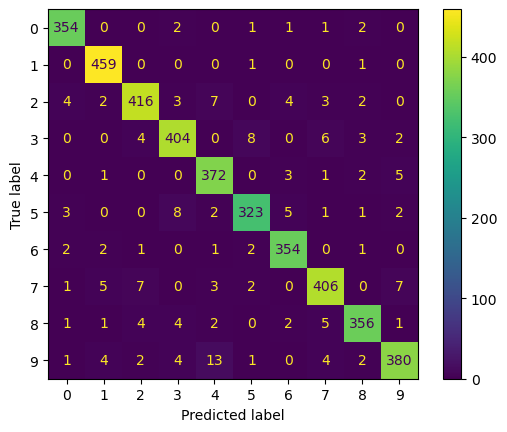

In [55]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for idx, i in enumerate(classifiers):
    predicted, X_test, y_test = fit_model(i,test_sample, images_haar_full, label)
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    disp.plot(ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_title('Klasyfikator: ' + title[idx])

    # print(f"Confusion matrix:\n{disp.confusion_matrix}")
fig.suptitle("Macierz pomyłek")
# plt.tight_layout()
plt.show()

In [62]:

images_haar_full_3 = np.empty(shape=(10000,64))
images_haar_full_L2 = np.empty(shape=(10000,211))
images_haar_full = np.empty(shape=(10000, 799))

images_haar_LL_3 = np.empty(shape=(10000,4,4))
images_haar_details_3 = np.empty(shape=(10000,12,4))

for i in range(len(images_haar_LL_2)):
    db_3_mnist_test = pywt.dwt2(images_haar_LL_2[i], 'db1')
    LL3, (LH3, HL3, HH3) = db_3_mnist_test
    images_haar_full_3[i] = np.concatenate((LL3,LH3,HL3,HH3), axis=None)
    images_haar_full_L2[i] = np.concatenate((images_haar_full_3[i],images_haar_details_2[i]), axis=0)
    images_haar_full[i] = np.concatenate((images_haar_full_L2[i],images_haar_details[i]), axis=0)
    images_haar_LL_2[i] = LL2
    images_haar_details_3[i] = np.concatenate((LH3,HL3,HH3))

In [65]:
test_sample = 0.4

for i in classifiers:
  print('Model: ',i)
  sumAcc = 0
  meanAcc = 0
  start_time = time.time() 
  for j in range(10):
      model = i
      predicted, X_test, y_test = fit_model(i,test_sample, images_haar_full, label)
      sumAcc += metrics.accuracy_score(y_test, predicted)
  meanAcc = sumAcc/10
  end_time = time.time()  # Koniec mierzenia czasu
  elapsed_time = end_time - start_time
  print('Średnia dokłądności: ',meanAcc)
  print('Czas obliczania: ', elapsed_time, ' sekund')

Model:  GaussianNB()
Średnia dokłądności:  0.5673750000000001
Czas obliczania:  4.712619304656982  sekund
Model:  LinearDiscriminantAnalysis()
Średnia dokłądności:  0.8534
Czas obliczania:  14.704219818115234  sekund
Model:  NearestCentroid()
Średnia dokłądności:  0.8206249999999999
Czas obliczania:  0.6777184009552002  sekund
Model:  KNeighborsClassifier(n_neighbors=1)
Średnia dokłądności:  0.9458500000000001
Czas obliczania:  8.11987042427063  sekund
Model:  KNeighborsClassifier(algorithm='brute', n_neighbors=3)
Średnia dokłądności:  0.94425
Czas obliczania:  8.798193454742432  sekund
Model:  KNeighborsClassifier()
Średnia dokłądności:  0.94245
Czas obliczania:  8.918343305587769  sekund
Model:  KNeighborsClassifier(n_neighbors=7)
Średnia dokłądności:  0.940175
Czas obliczania:  8.457642793655396  sekund
Model:  SVC()
Średnia dokłądności:  0.9579000000000001
Czas obliczania:  128.29922556877136  sekund


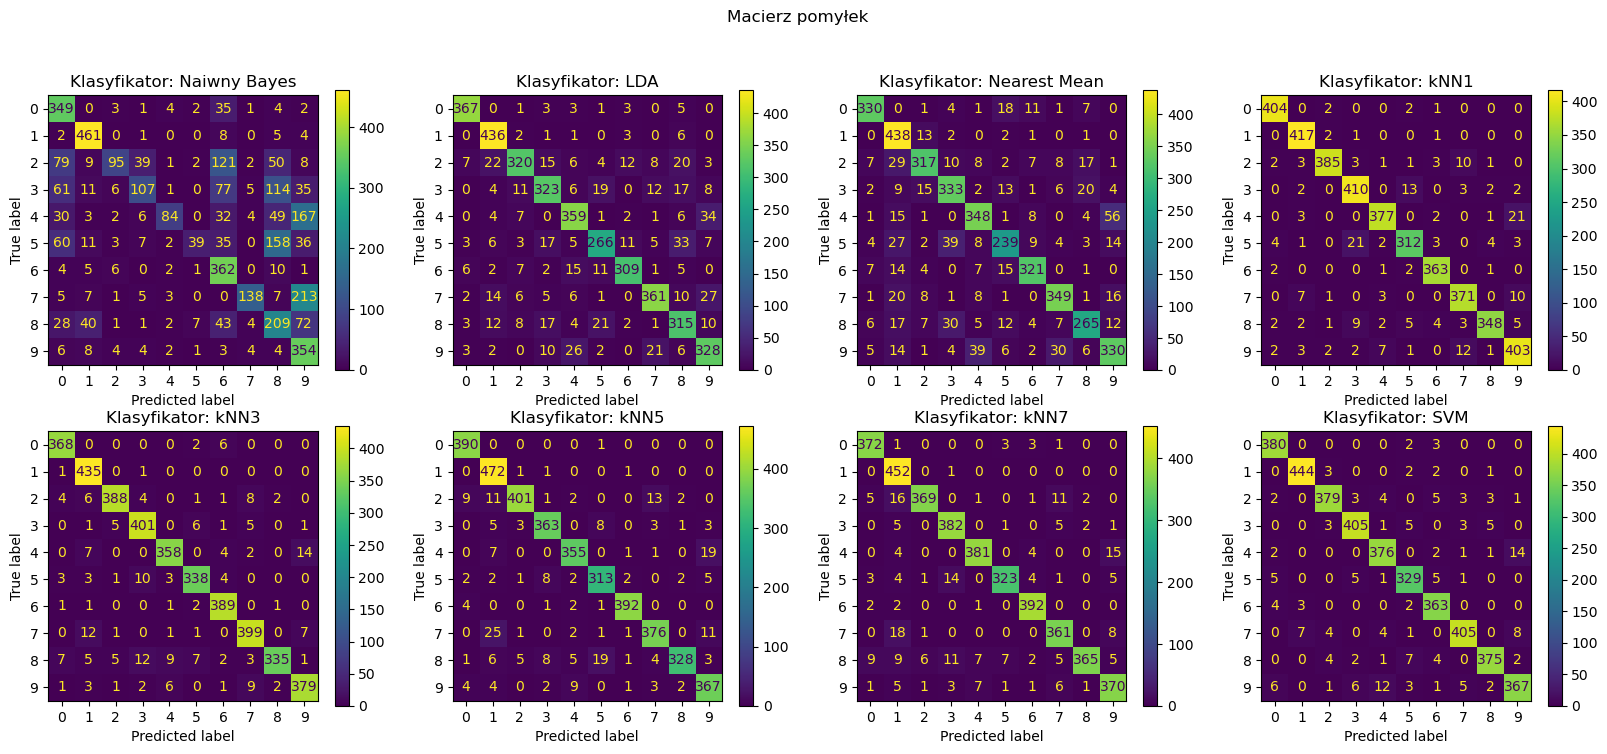

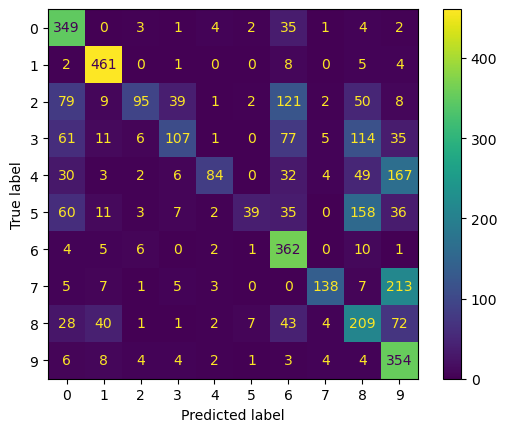

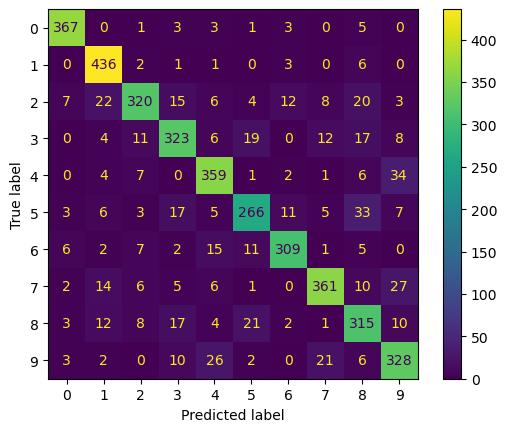

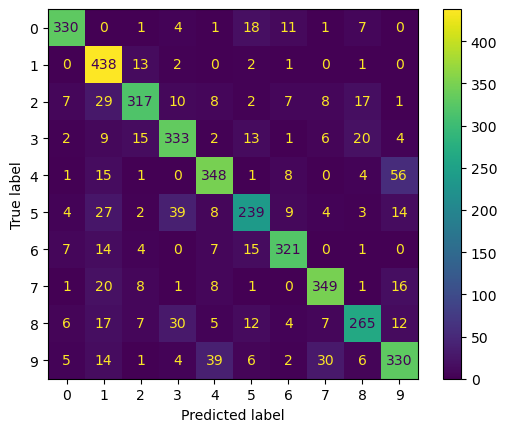

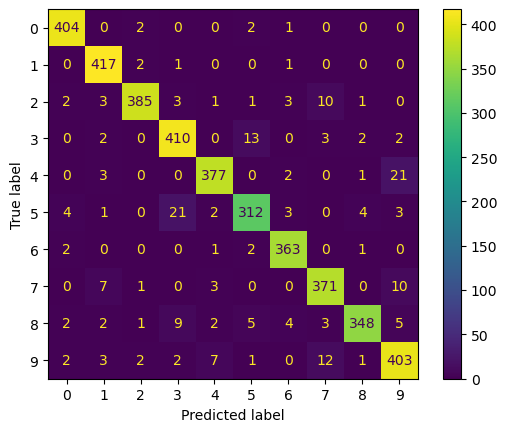

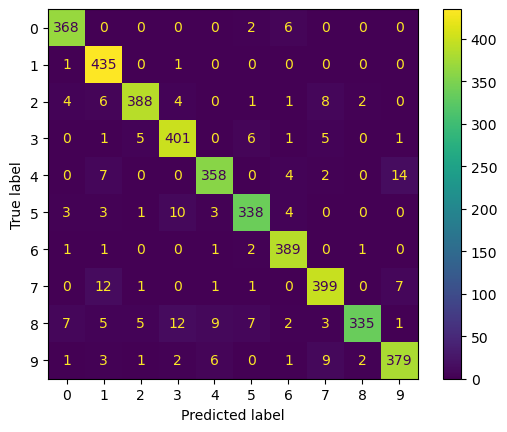

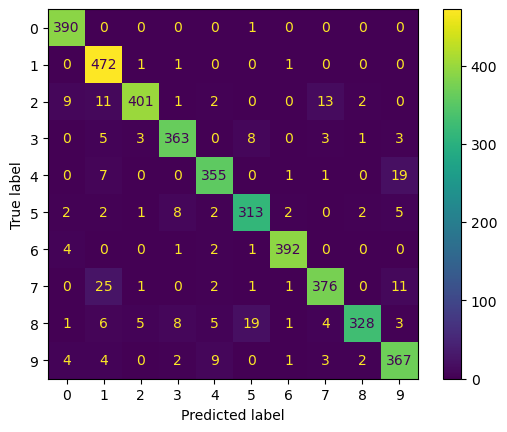

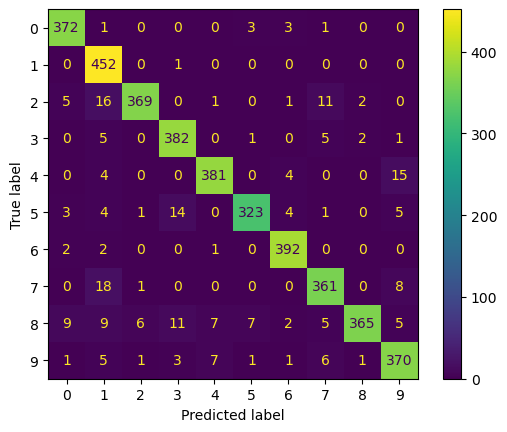

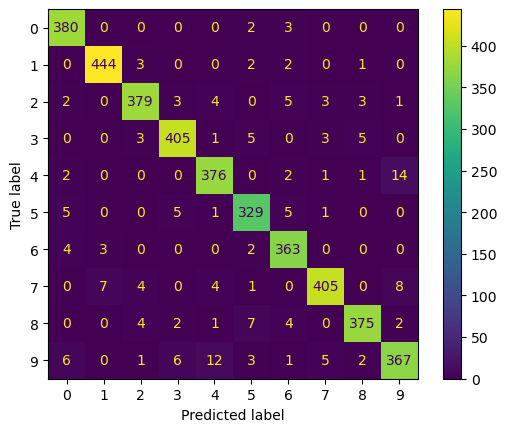

In [66]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

for idx, i in enumerate(classifiers):
    predicted, X_test, y_test = fit_model(i,test_sample, images_haar_full, label)
    disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
    disp.plot(ax=axes[idx // 4, idx % 4])
    axes[idx // 4, idx % 4].set_title('Klasyfikator: ' + title[idx])

    # print(f"Confusion matrix:\n{disp.confusion_matrix}")
fig.suptitle("Macierz pomyłek")
# plt.tight_layout()
plt.show()